# Customer sales analysis in Iran

![Customer](https://www.eiu.com/n/wp-content/uploads/2024/07/GettyImages-1371981344-scaled-1.jpg)

#  Import libraries and Dataset

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
import warnings
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [144]:
import jdatetime

In [145]:
import seaborn as sns

In [146]:
from scipy.stats import skew
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [147]:
df = pd.DataFrame(pd.read_csv('Stores_Transactions.csv'))

In [148]:
df

,user_id,transaction_id,transaction_date,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items
0,1,1,1403-01-01,23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1
1,1,2,1403-01-02,16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1
2,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2
3,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 17,1,217517.33,217517.33,323033.43,2
4,1,4,1403-01-04,15:22:12,Hardware Store,Hardware Store Product 40,1,1949500.13,1949500.13,6191593.89,6
...,...,...,...,...,...,...,...,...,...,...,...
8187,12,306,1403-07-25,13:23:31,Supermarket,Supermarket Product 125,7,44641.46,312490.22,1712890.34,31
8188,12,307,1403-07-27,08:10:55,Music Store,Music Store Product 10,4,71906.99,287627.96,404626.76,5
8189,12,307,1403-07-27,08:10:55,Music Store,Music Store Product 34,1,116998.80,116998.80,404626.76,5
8190,12,308,1403-07-27,22:01:02,Cosmetics Store,Cosmetics Store Product 13,9,445439.80,4008958.20,4008958.20,9


# Preprocessing

In [149]:
df.isna().sum()

user_id             0
transaction_id      0
transaction_date    0
transaction_time    0
store               0
product_name        0
quantity            0
unit_price          0
total_price         0
total_amount        0
total_items         0
dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           8192 non-null   int64  
 1   transaction_id    8192 non-null   int64  
 2   transaction_date  8192 non-null   object 
 3   transaction_time  8192 non-null   object 
 4   store             8192 non-null   object 
 5   product_name      8192 non-null   object 
 6   quantity          8192 non-null   int64  
 7   unit_price        8192 non-null   float64
 8   total_price       8192 non-null   float64
 9   total_amount      8192 non-null   float64
 10  total_items       8192 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 704.1+ KB


In [151]:
df.describe()

,user_id,transaction_id,quantity,unit_price,total_price,total_amount,total_items
count,8192.000000,8192.000000,8192.000000,8.192000e+03,8.192000e+03,8.192000e+03,8192.000000
mean,6.557617,161.153320,2.965576,2.170055e+06,3.426030e+06,6.339663e+06,8.775513
std,3.468765,93.056739,3.949849,6.191959e+06,9.584929e+06,1.393022e+07,9.698697
min,1.000000,1.000000,1.000000,5.013100e+03,5.035480e+03,7.839930e+03,1.000000
25%,4.000000,81.000000,1.000000,8.416818e+04,1.853002e+05,8.157042e+05,3.000000
50%,7.000000,161.000000,2.000000,2.872106e+05,5.467666e+05,1.944458e+06,5.000000
75%,10.000000,242.000000,3.000000,9.350427e+05,1.939030e+06,4.701880e+06,10.000000
max,12.000000,348.000000,48.000000,4.999451e+07,1.406411e+08,1.406411e+08,50.000000


In [152]:
df.describe(include='object')

,transaction_date,transaction_time,store,product_name
count,8192,8192,8192,8192
unique,215,3762,15,1446
top,1403-06-06,13:24:16,Supermarket,Pet Store Product 10
freq,70,10,973,24


<table border="1" style="border-collapse: collapse; width: 100%; text-align: center;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th>Column</th>
            <th>Unique Count</th>
            <th>Most Frequent Value</th>
            <th>Frequency of Most Frequent Value</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>store</td>
            <td>15</td>
            <td>Supermarket</td>
            <td>973</td>
            <td>Due to easy access, product variety, online sales growth (especially Snap Shop), and the fact that supermarket purchases are often for daily or urgent needs, supermarkets attract a lot of customers. For example, people visit supermarkets for daily grocery shopping, beverages, and other consumer goods. Given the high demand for supermarkets, they should be a key focus.</td>
        </tr>
        <tr>
            <td>product_name</td>
            <td>1446</td>
            <td>Pet Store Product 10</td>
            <td>24</td>
            <td>In recent years, especially in large cities, pet ownership (such as dogs, cats, birds, etc.) has become a growing trend. This has led to an increased demand for pet-related products such as food, accessories, and healthcare items. Given the high demand for this product, it should be considered a key focus.</td>
        </tr>
        <tr>
            <td>weekday</td>
            <td>7</td>
            <td>Saturday</td>
            <td>1320</td>
            <td>Saturday has the highest number of transactions, likely due to the start of the workweek, planning for weekly shopping, catching up on delayed purchases from Friday (a holiday), bulk purchases by businesses, increased organizational buying, salary payments leading to higher liquidity, special store discounts, and preparing school and university supplies.</td>
        </tr>
        <tr>
            <td>product_name_re</td>
            <td>15</td>
            <td>Supermarket Product</td>
            <td>973</td>
            <td>One of the key insights is that a large portion of purchases in Iran come from supermarkets. Considering holidays and Ramadan, supermarket purchases are likely to increase.</td>
        </tr>
        <tr>
            <td>transaction_date_shamsi</td>
            <td>215</td>
            <td>1403-06-06</td>
            <td>70</td>
            <td>This date has been repeated multiple times, possibly due to a weekly holiday in September.</td>
        </tr>
        <tr>
            <td>month_of_year</td>
            <td>8</td>
            <td>Ordibehesht (May)</td>
            <td>1251</td>
            <td>Since data is available for only 8 months, and considering that this month coincided with Ramadan, people made significantly more purchases. This suggests that Ramadan is a crucial target period for sales.</td>
        </tr>
    </tbody>
</table>


In [153]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05) 

df['anomaly'] = model.fit_predict(df[['total_amount']])

anomaly=df[df['anomaly'] == -1]

In [154]:
print(f'The number of outliers is the data rate : {len(anomaly)}')

The number of outliers is the data rate : 408


# EDA

In [155]:
df["transaction_date"] = df["transaction_date"].apply(lambda x: jdatetime.datetime.strptime(x, "%Y-%m-%d").togregorian())
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

In [156]:
# df["transaction_date"] = pd.to_datetime(df["transaction_date"], format="%Y-%m-%d")
df["transaction_time"] = pd.to_datetime(df["transaction_time"], format="%H:%M:%S").dt.time

df["weekday"] = df["transaction_date"].dt.day_name()
df["hour"] = pd.to_datetime(df["transaction_time"], format="%H:%M:%S").dt.hour

In [157]:

df["transaction_date_shamsi"] = df["transaction_date"].apply(lambda x: jdatetime.date.fromgregorian(year=x.year, 
                                                                                                    month=x.month, day=x.day))


In [158]:
# df["transaction_date"] = df["transaction_date"].apply(lambda x: jdatetime.datetime.strptime(x, "%Y-%m-%d").togregorian())
# df["transaction_date"] = pd.to_datetime(df["transaction_date"])

In [159]:
df["product_name_re"] = df["product_name"].str.replace(r'\d+', '', regex=True).str.strip()

In [160]:
df["transaction_date_shamsi"] = df["transaction_date"].apply(lambda x: jdatetime.date.fromgregorian(year=x.year, 
                                                                                                    month=x.month, day=x.day))


In [161]:
df["month_of_year"] = df["transaction_date"].dt.month_name()

In [162]:
df["day"] = df["transaction_date"].dt.day

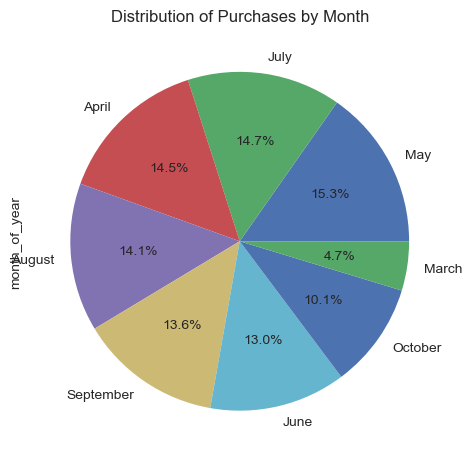

In [163]:
df["month_of_year"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Purchases by Month')

plt.show()

<table border="1" style="border-collapse: collapse; width: 100%; text-align: center;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th>Months</th>
            <th>Analysis</th>
            <th>Conclusion</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Highest purchases in May</td>
            <td>This month has the highest number of purchases, possibly due to special occasions, discounts, or increased seasonal demand.</td>
            <td>Planning for increased advertising and special discounts is essential in this month due to Ramadan and increased family purchases for Iftar and Suhoor.</td>
        </tr>
        <tr>
            <td>Lowest purchases in March</td>
            <td>Contrary to expectations, purchases in March were low. This may be due to Nowruz holidays, reduced stock availability, or rising prices.</td>
            <td>Due to the Nowruz holidays, sales have declined in this month. This should be considered when planning, as sales tend to be low during this period.</td>
        </tr>
        <tr>
            <td>April, July, and August</td>
            <td>These months have the highest purchases after May, indicating increased demand during this period.</td>
            <td>In April, due to Nowruz and Ramadan, and in July and August, due to family vacations and increased demand for summer-related products (e.g., air conditioners and bottled water), sales have increased.</td>
        </tr>
        <tr>
            <td>Lower purchases in June and October</td>
            <td>These months show a decline in purchases compared to others, possibly due to seasonal demand or economic factors.</td>
            <td>In June, this might be due to the start of student exams, and in October, families may have lower budgets after heavy spending on school supplies in September. Stores should consider offering special discounts to attract customers.</td>
        </tr>
    </tbody>
</table>


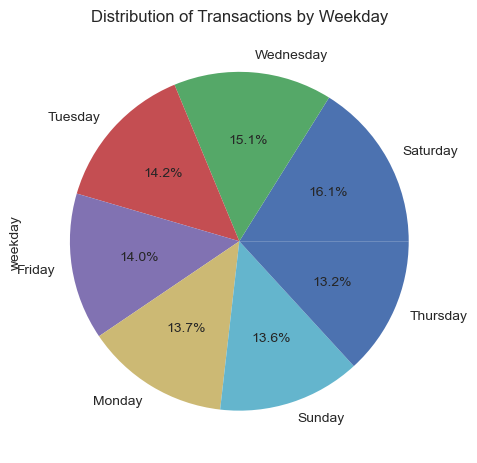

In [164]:
df['weekday'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Transactions by Weekday')

plt.show()

<table border="1" style="border-collapse: collapse; width: 100%; text-align: center;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th>Day of the Week</th>
            <th>Percentage of Transactions</th>
            <th>Analysis & Explanation</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Saturday</td>
            <td>16.1%</td>
            <td>Start of the week and the first working day; people make essential purchases after the weekend.</td>
        </tr>
        <tr>
            <td>Wednesday</td>
            <td>15.1%</td>
            <td>Close to the weekend, a suitable time for weekly shopping and preparation for holidays.</td>
        </tr>
        <tr>
            <td>Tuesday</td>
            <td>14.2%</td>
            <td>A relatively high transaction day, likely due to mid-week shopping by consumers.</td>
        </tr>
        <tr>
            <td>Friday</td>
            <td>14.0%</td>
            <td>A public holiday; some businesses are closed, but families go out for leisure shopping.</td>
        </tr>
        <tr>
            <td>Monday</td>
            <td>13.7%</td>
            <td>A day with fewer transactions; people are usually adapting to their work schedules.</td>
        </tr>
        <tr>
            <td>Sunday</td>
            <td>13.6%</td>
            <td>Low transaction volume, similar to Monday, as people do not make essential purchases.</td>
        </tr>
        <tr>
            <td>Thursday</td>
            <td>13.2%</td>
            <td>The lowest transaction volume; some offices and businesses are closed, leading to reduced shopping activity.</td>
        </tr>
    </tbody>
</table>


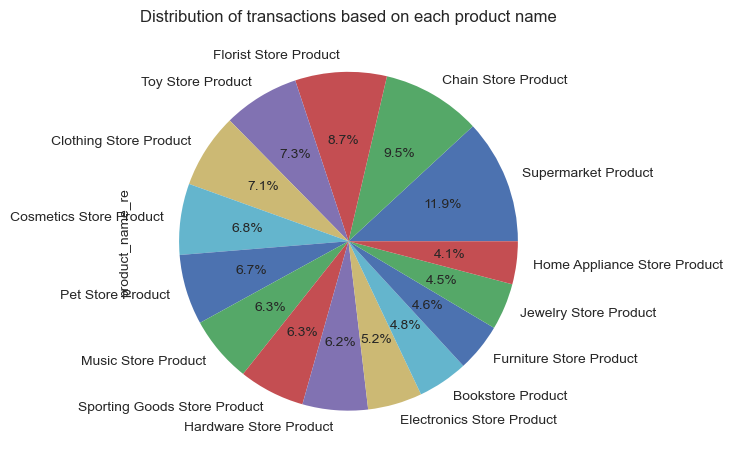

In [165]:
df['product_name_re'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title ("Distribution of transactions based on each product name")

plt.show()

<table border="1" style="border-collapse: collapse; width: 100%; text-align: center;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th>Product Category</th>
            <th>Share of Total Sales (%)</th>
            <th>Analysis & Recommendations</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Supermarket Product</td>
            <td>11.9%</td>
            <td>Highest share; focus on special discounts and online shopping is recommended.</td>
        </tr>
        <tr>
            <td>Chain Store Product</td>
            <td>9.5%</td>
            <td>High sales; use of promotional campaigns and discount festivals is advisable.</td>
        </tr>
        <tr>
            <td>Toy Store Product</td>
            <td>8.7%</td>
            <td>High demand; consider seasonal discounts and events like Children’s Day.</td>
        </tr>
        <tr>
            <td>Clothing Store Product</td>
            <td>7.3%</td>
            <td>Medium sales; increasing discounts during seasonal changes could be effective.</td>
        </tr>
        <tr>
            <td>Cosmetics Store Product</td>
            <td>6.8%</td>
            <td>Stable but lower than supermarkets; influencer marketing can be impactful.</td>
        </tr>
        <tr>
            <td>Pet Store Product</td>
            <td>6.7%</td>
            <td>Growing demand; offering bundle and subscription discounts can increase sales.</td>
        </tr>
        <tr>
            <td>Music Store Product</td>
            <td>6.3%</td>
            <td>Needs more support; cultural festival promotions can help boost sales.</td>
        </tr>
        <tr>
            <td>Sporting Goods Store Product</td>
            <td>6.3%</td>
            <td>Special promotions for sports events are recommended.</td>
        </tr>
        <tr>
            <td>Hardware Store Product</td>
            <td>6.2%</td>
            <td>Niche market; focusing on B2B advertising would be more effective.</td>
        </tr>
        <tr>
            <td>Electronics Store Product</td>
            <td>4.8%</td>
            <td>High price reduces repeat purchases; offering installment plans and warranties is recommended.</td>
        </tr>
        <tr>
            <td>Bookstore Product</td>
            <td>5.2%</td>
            <td>Medium sales; increasing exhibition discounts and offering free shipping can be effective.</td>
        </tr>
        <tr>
            <td>Furniture Store Product</td>
            <td>4.6%</td>
            <td>Limited market; offering discounts on bulk purchases or installment plans would be beneficial.</td>
        </tr>
        <tr>
            <td>Jewelry Store Product</td>
            <td>4.5%</td>
            <td>Lower purchases due to high price; offering special campaigns and installment options is recommended.</td>
        </tr>
        <tr>
            <td>Home Appliance Store Product</td>
            <td>4.1%</td>
            <td>High-priced and less frequent purchases; installment plans are suggested.</td>
        </tr>
    </tbody>
</table>


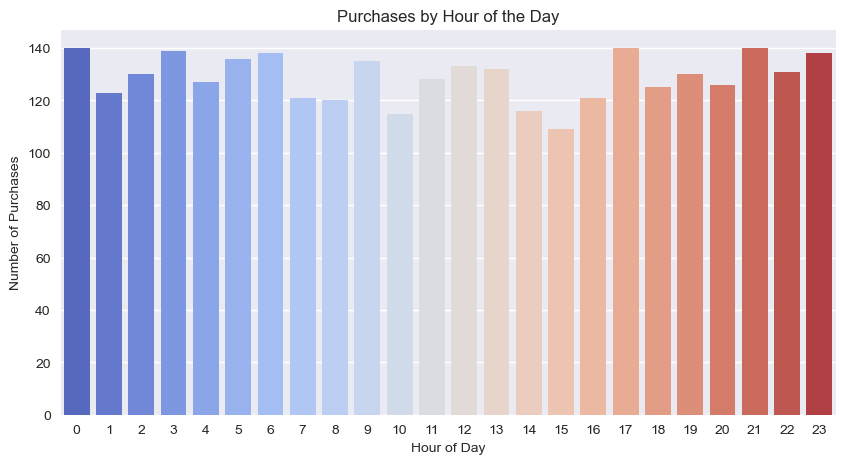

In [166]:
hourly_purchases = df.groupby("hour")["transaction_id"].nunique().reset_index()
hourly_purchases.rename(columns={"transaction_id": "purchase_count"}, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=hourly_purchases, x="hour", y="purchase_count", palette="coolwarm")
plt.title("Purchases by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Purchases")
plt.show()

<table border="1" style="border-collapse: collapse; width: 100%; text-align: center;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th>Hour</th>
            <th>Purchase Volume</th>
            <th>Analysis Based on Iranian Buying Behavior</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>00:00 - 03:00</td>
            <td>High</td>
            <td>Night purchases due to online discounts and late-night users' activity.</td>
        </tr>
        <tr>
            <td>04:00 - 06:00</td>
            <td>Medium</td>
            <td>Decrease in purchases due to people's sleep time.</td>
        </tr>
        <tr>
            <td>07:00 - 09:00</td>
            <td>Medium</td>
            <td>Morning purchases from working individuals and homemakers.</td>
        </tr>
        <tr>
            <td>10:00 - 12:00</td>
            <td>High</td>
            <td>Increase in purchases due to daily activities and greater internet access.</td>
        </tr>
        <tr>
            <td>13:00 - 15:00</td>
            <td>Medium to Low</td>
            <td>Decrease in purchases due to post-lunch rest.</td>
        </tr>
        <tr>
            <td>16:00 - 18:00</td>
            <td>Peak</td>
            <td>Peak shopping hours due to the end of office hours and users' leisure time.</td>
        </tr>
        <tr>
            <td>19:00 - 21:00</td>
            <td>High</td>
            <td>Family shopping and preparation for the next day.</td>
        </tr>
        <tr>
            <td>22:00 - 23:00</td>
            <td>High</td>
            <td>Increase in last-minute purchases and usage of end-of-day special offers.</td>
        </tr>
    </tbody>
</table>


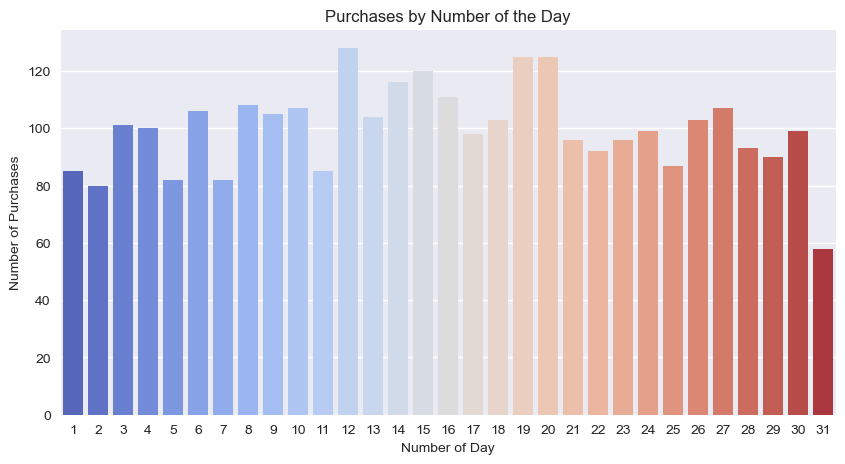

In [167]:
daily_purchases = df.groupby("day")["transaction_id"].nunique().reset_index()
daily_purchases.rename(columns={"transaction_id": "purchase_count"}, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=daily_purchases, x="day", y="purchase_count", palette="coolwarm")
plt.title("Purchases by Number of the Day")
plt.xlabel("Number of Day")
plt.ylabel("Number of Purchases")
plt.show()

<table border="1" style="border-collapse: collapse; width: 100%; text-align: center;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th>Day of the Month</th>
            <th>Purchase Volume</th>
            <th>Analysis Based on Iranian Buying Behavior</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>1 - 5</td>
            <td>Medium to Low</td>
            <td>Limited purchases due to the beginning of the month and essential cost payments.</td>
        </tr>
        <tr>
            <td>6 - 10</td>
            <td>Medium to High</td>
            <td>Increased purchases as a few days have passed since receiving salaries and settling debts.</td>
        </tr>
        <tr>
            <td>11 - 13</td>
            <td>Peak</td>
            <td>Highest purchase volume, usually after employees and workers receive their salaries.</td>
        </tr>
        <tr>
            <td>14 - 17</td>
            <td>Medium</td>
            <td>Decrease in purchases due to completing major purchases in earlier days.</td>
        </tr>
        <tr>
            <td>18 - 21</td>
            <td>Peak</td>
            <td>Increase in purchases again, likely due to mid-month discounts.</td>
        </tr>
        <tr>
            <td>22 - 26</td>
            <td>Medium to High</td>
            <td>Planned purchases for the end of the month.</td>
        </tr>
        <tr>
            <td>27 - 30</td>
            <td>Medium</td>
            <td>Essential purchases before the household budget runs out.</td>
        </tr>
        <tr>
            <td>31</td>
            <td>Severe Drop</td>
            <td>Lowest purchase volume due to the end of the monthly budget and waiting for the next month.</td>
        </tr>
    </tbody>
</table>


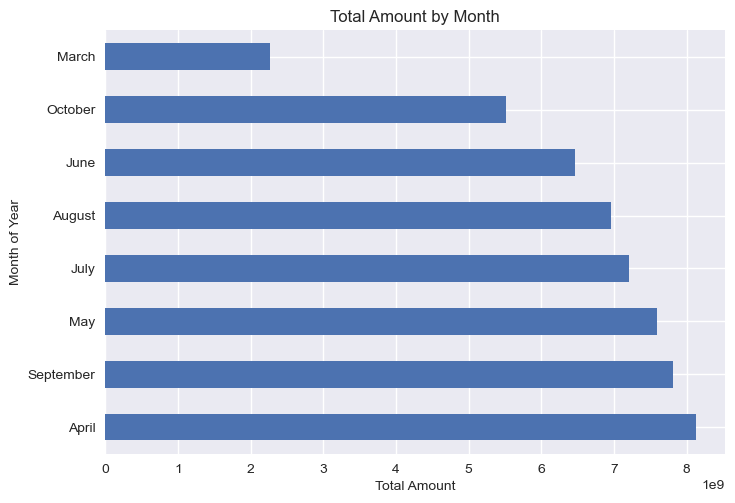

In [168]:
df.groupby('month_of_year')['total_amount'].sum().sort_values(ascending=False).plot.barh()
plt.title('Total Amount by Month')

plt.xlabel('Total Amount')
plt.ylabel('Month of Year')

plt.show()

As previously mentioned, in the months of April and May, there is a lot of customer shopping due to Nowruz and Ramadan, and in the month of September, due to the reopening of schools in October, family shopping has increased. In months like July and August, attention should be paid to the next steps. Due to the start of family travel and the need for supplies in the summer season, such as buying mineral water, coolers, and clothes like T-shirts, Iranian families' shopping increases.

In [169]:
df

,user_id,transaction_id,transaction_date,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items,anomaly,weekday,hour,transaction_date_shamsi,product_name_re,month_of_year,day
0,1,1,2024-03-20,23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1,1,Wednesday,23,1403-01-01,Jewelry Store Product,March,20
1,1,2,2024-03-21,16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1,1,Thursday,16,1403-01-02,Electronics Store Product,March,21
2,1,3,2024-03-22,07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2,1,Friday,7,1403-01-03,Cosmetics Store Product,March,22
3,1,3,2024-03-22,07:45:32,Cosmetics Store,Cosmetics Store Product 17,1,217517.33,217517.33,323033.43,2,1,Friday,7,1403-01-03,Cosmetics Store Product,March,22
4,1,4,2024-03-23,15:22:12,Hardware Store,Hardware Store Product 40,1,1949500.13,1949500.13,6191593.89,6,1,Saturday,15,1403-01-04,Hardware Store Product,March,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,12,306,2024-10-16,13:23:31,Supermarket,Supermarket Product 125,7,44641.46,312490.22,1712890.34,31,1,Wednesday,13,1403-07-25,Supermarket Product,October,16
8188,12,307,2024-10-18,08:10:55,Music Store,Music Store Product 10,4,71906.99,287627.96,404626.76,5,1,Friday,8,1403-07-27,Music Store Product,October,18
8189,12,307,2024-10-18,08:10:55,Music Store,Music Store Product 34,1,116998.80,116998.80,404626.76,5,1,Friday,8,1403-07-27,Music Store Product,October,18
8190,12,308,2024-10-18,22:01:02,Cosmetics Store,Cosmetics Store Product 13,9,445439.80,4008958.20,4008958.20,9,1,Friday,22,1403-07-27,Cosmetics Store Product,October,18


In [170]:
month_user_purchases = df.groupby(['user_id', 'month_of_year'])['total_amount'].sum().reset_index()

max_month_purchases = month_user_purchases.loc[month_user_purchases.groupby('month_of_year')['total_amount'].idxmax()]

max_month_purchasess = max_month_purchases.sort_values(by='month_of_year')

max_month_purchasess

,user_id,month_of_year,total_amount
0,1,April,1.028514e+09
9,2,August,8.146473e+08
82,11,July,9.243419e+08
3,1,June,8.144592e+08
44,6,March,3.409292e+08
21,3,May,1.272150e+09
78,10,October,9.632148e+08
55,7,September,1.029144e+09


The highest purchase occurred in May with a total of 1.272 billion Toman. April and September also had significant purchases, each exceeding 1 billion Toman. The lowest purchase was recorded in March with 349 million Toman. These data suggest that purchases were highest in May, April, and September, while the lowest occurred in March

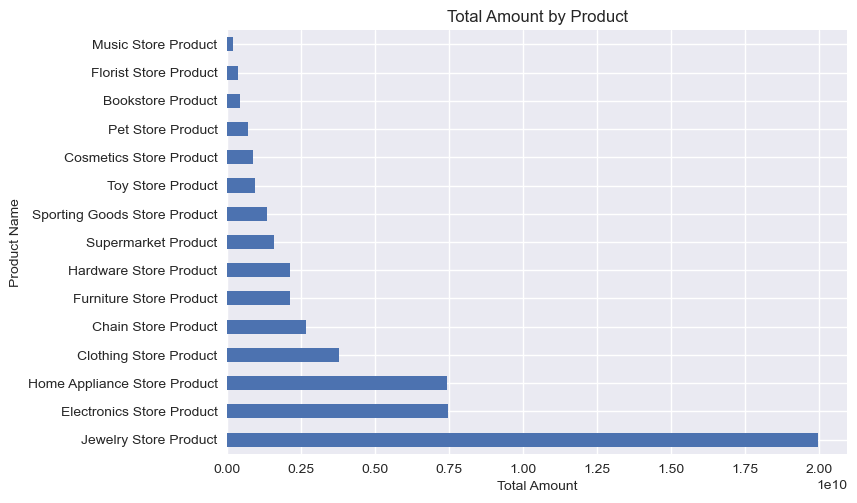

In [171]:
df.groupby('product_name_re')['total_amount'].sum().sort_values(ascending=False).plot.barh()
plt.title('Total Amount by Product')

plt.xlabel('Total Amount')
plt.ylabel('Product Name')

plt.show()

<table border="1" style="border-collapse: collapse; width: 100%; text-align: center;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th>Product Category</th>
            <th>Sales Volume</th>
            <th>Analysis Based on Iranian Buying Behavior</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Jewelry</td>
            <td>Very High</td>
            <td>Luxury purchases, high demand for investment and gifts.</td>
        </tr>
        <tr>
            <td>Electronics</td>
            <td>High</td>
            <td>Popular due to daily needs and technology demands.</td>
        </tr>
        <tr>
            <td>Home Appliances</td>
            <td>High</td>
            <td>Essential purchases for homes, especially during special occasions.</td>
        </tr>
        <tr>
            <td>Clothing</td>
            <td>Medium to High</td>
            <td>Cyclical purchases, dependent on season and discounts.</td>
        </tr>
        <tr>
            <td>Chain Stores</td>
            <td>Medium</td>
            <td>Mixed purchases with periodic discounts.</td>
        </tr>
        <tr>
            <td>Furniture and Décor</td>
            <td>Medium</td>
            <td>Dependent on seasonal changes and household needs.</td>
        </tr>
        <tr>
            <td>Hardware Stores</td>
            <td>Medium</td>
            <td>Specific demand for repairs and renovations.</td>
        </tr>
        <tr>
            <td>Supermarket</td>
            <td>Medium</td>
            <td>Essential daily purchases, with high competition.</td>
        </tr>
        <tr>
            <td>Sporting Goods</td>
            <td>Low</td>
            <td>Limited market, specific demand during sales periods.</td>
        </tr>
        <tr>
            <td>Toys</td>
            <td>Low</td>
            <td>Dependent on specific seasons like New Year and back-to-school periods.</td>
        </tr>
        <tr>
            <td>Cosmetics</td>
            <td>Low</td>
            <td>High competition, requires strong advertising.</td>
        </tr>
        <tr>
            <td>Pet Stores</td>
            <td>Very Low</td>
            <td>Specific market, limited to interested individuals.</td>
        </tr>
        <tr>
            <td>Bookstore</td>
            <td>Very Low</td>
            <td>Requires extensive advertising and attractive discounts.</td>
        </tr>
        <tr>
            <td>Flower Shop</td>
            <td>Very Low</td>
            <td>Occasional purchases, needs special campaigns.</td>
        </tr>
        <tr>
            <td>Music Store</td>
            <td>Very Low</td>
            <td>Decreased demand due to the digitalization of music.</td>
        </tr>
    </tbody>
</table>


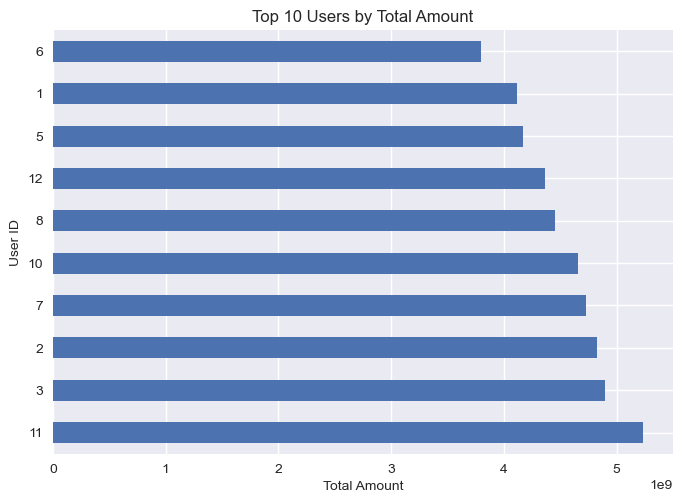

In [172]:
df.groupby('user_id')['total_amount'].sum().sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Users by Total Amount')

plt.xlabel('Total Amount')
plt.ylabel('User ID')

plt.show()

Users 11, 3, and 2 have high transactions, and users 7, 10, 8, and 12 have medium transactions, and users 5, 1, and 6 have lower spending. There should be a plan for each of these groups, such as providing strong after-sales service to create a greater sense of trust, especially in expensive purchases such as home appliances and electronics.

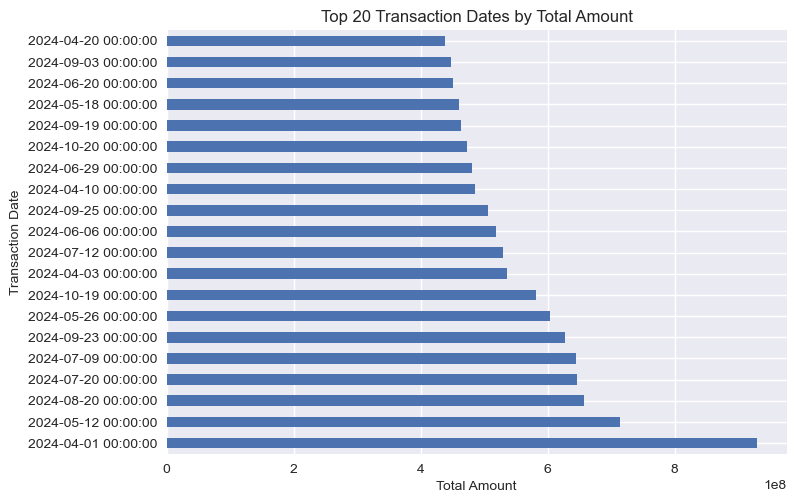

In [173]:
df.groupby('transaction_date')['total_amount'].sum().sort_values(ascending=False).head(20).plot.barh()
plt.title('Top 20 Transaction Dates by Total Amount')

plt.xlabel('Total Amount')
plt.ylabel('Transaction Date')

plt.show()

According to data analysis, the three periods of national and religious holidays, summer season, and school reopening have the highest shopping volume in Iran. Religious holidays such as Nowruz, Eid al-Adha, and Ghadir increase the purchase of clothing, gifts, and special foods, while summer has a high demand for entertainment, digital, and clothing items due to travel and leisure. Also, September and October, with the start of schools and universities, bring a peak in the purchase of stationery, bags, shoes, and electronic devices. Therefore, focusing on special discounts, targeted advertising, and increasing the inventory of high-demand products during these periods can lead to sales growth and attract more customers.

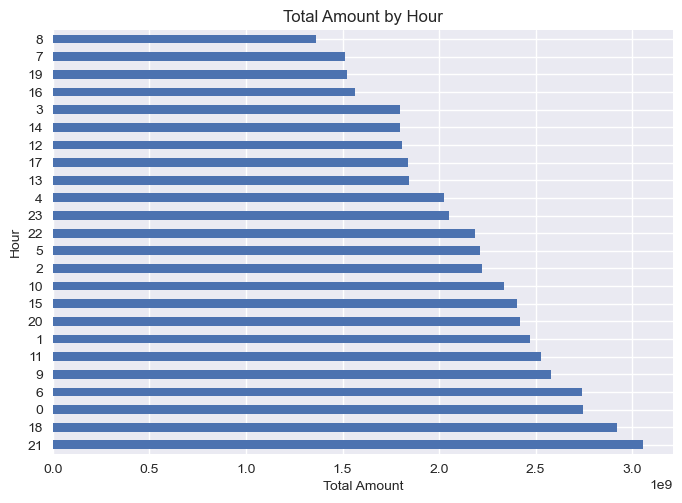

In [174]:
df.groupby('hour')['total_amount'].sum().sort_values(ascending=False).plot.barh()
plt.title('Total Amount by Hour')

plt.xlabel('Total Amount')
plt.ylabel('Hour')


plt.show()

According to the data provided, the highest number of transactions was made at 21:00, 18:00, and 00:00 (midnight). This shows that Iranian users mostly make their purchases in the late evening and early morning hours. 6:00 and 9:00 are also among the periods with high transaction volume, which could indicate daily purchases and early business. 2:00 to 7:00 have the lowest number of transactions, which is probably due to working hours and afternoon breaks.

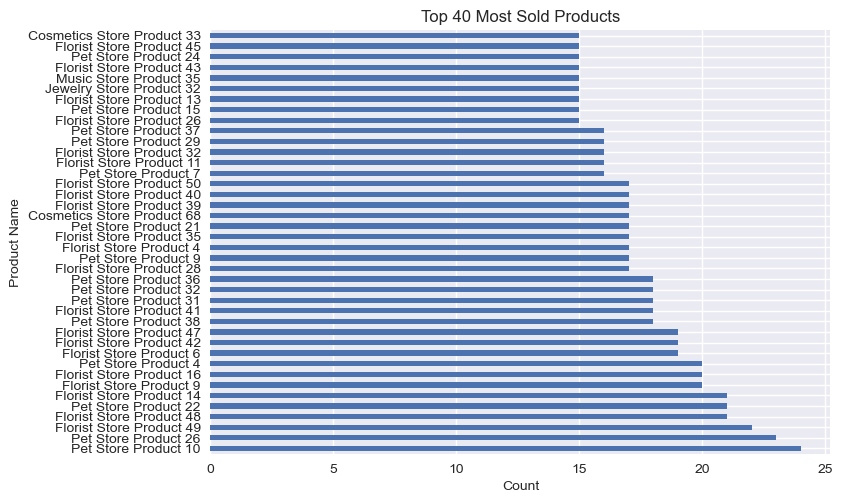

In [175]:
df['product_name'].value_counts().head(40).plot.barh()
plt.title('Top 40 Most Sold Products')

plt.xlabel('Count')
plt.ylabel('Product Name')


plt.show()

According to the data provided, products from pet stores (Pet Store), florist stores (Florist Store) and cosmetics stores have had the highest purchase volume. Among them, pet-related products such as product number 10 and 26 and florist products such as products number 49, 48 and 14 are at the top of the list and the behavioral pattern of Iranians should be taken into account. In addition, the growth of the pet products market, which indicates the increasing desire of Iranians to keep pets, and high purchases from florists can be due to special occasions such as holidays, birthdays and romantic events, and cosmetic products are also in high demand, which indicates the importance of beauty and personal care in society.

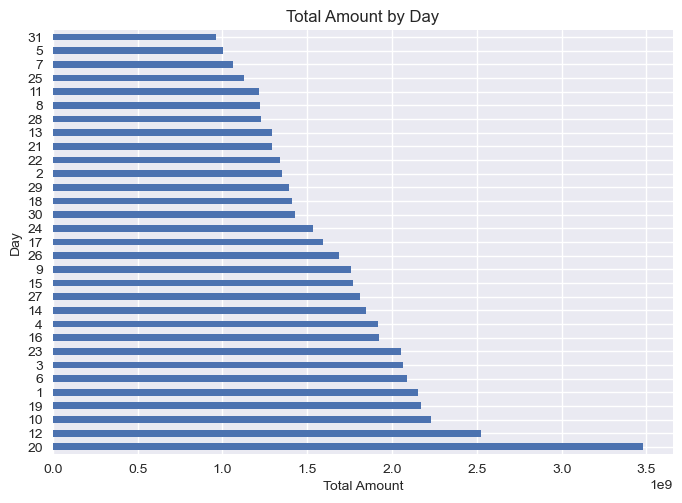

In [176]:
df.groupby('day')['total_amount'].sum().sort_values(ascending=False).plot.barh()
plt.title('Total Amount by Day')

plt.xlabel('Total Amount')
plt.ylabel('Day')

plt.show()

A study of Iranians’ shopping patterns shows that the 10th to 20th of the month have the highest transaction volume due to salary receipts and increased purchasing power, while the last days of the month (27th to 30th) also have a significant share of transactions due to planned purchases and fulfilling essential needs. Also, the early part of the month (1st to 6th) has a relatively high purchase volume due to essential purchases. Accordingly, businesses can maximize their sales and capture a greater share of the market by offering special discounts on peak shopping days, increasing advertising during high-demand periods, and optimizing inventory.

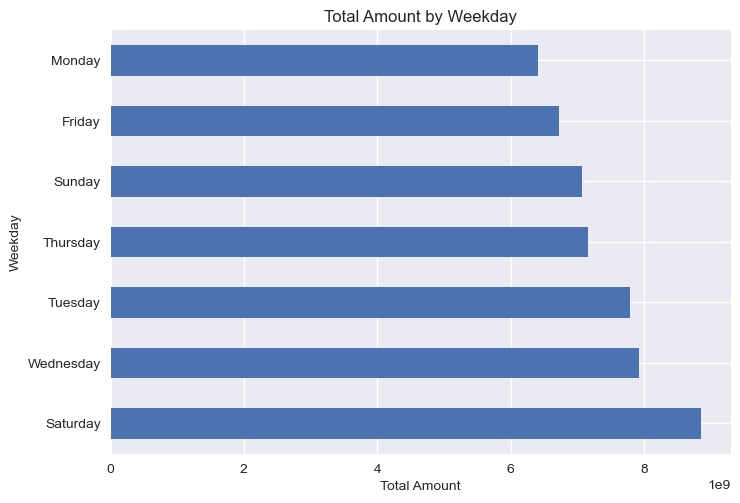

In [177]:
df.groupby('weekday')['total_amount'].sum().sort_values(ascending=False).plot.barh()
plt.title('Total Amount by Weekday')

plt.xlabel('Total Amount')
plt.ylabel('Weekday')

plt.show()

An examination of the number of transactions on weekdays shows that Saturdays have the highest volume of purchases, which could be due to the start of the work week and the fulfillment of new needs. Tuesdays and Wednesdays also have a high volume of transactions due to being in the middle of the week. In contrast, Mondays have the lowest volume of purchases, which is probably due to the decrease in liquidity after the initial purchases of the week. Also, Thursdays and Fridays, despite being closed, still have a high volume of transactions, which indicates an increase in family and leisure purchases at the end of the week.

In [178]:
daily_user_purchases = df.groupby(['user_id', 'weekday'])['total_amount'].sum().reset_index()

max_daily_purchases = daily_user_purchases.loc[daily_user_purchases.groupby('weekday')['total_amount'].idxmax()]

max_daily_purchasess = max_daily_purchases.sort_values(by='weekday')

max_daily_purchasess

,user_id,weekday,total_amount
49,8,Friday,7.833743e+08
8,2,Monday,8.669420e+08
9,2,Saturday,1.037192e+09
45,7,Sunday,1.043448e+09
81,12,Thursday,1.201931e+09
75,11,Tuesday,1.170143e+09
48,7,Wednesday,1.281352e+09


The highest purchases occurred in the middle of the week, particularly on Tuesday and Wednesday. User 7 had the highest purchase on Wednesday with 1.281 billion Toman, while User 2 made significant purchases on Monday and Saturday, each exceeding 1 billion Toman. Users 7 and 12 consistently had the highest purchases on various days, and the lowest purchase occurred on Friday with 783 million Toman, indicating fewer large purchases on that day. This suggests that heavy purchases tend to happen in the middle of the week, with users like 7 and 2 showing more consistent buying behavior.

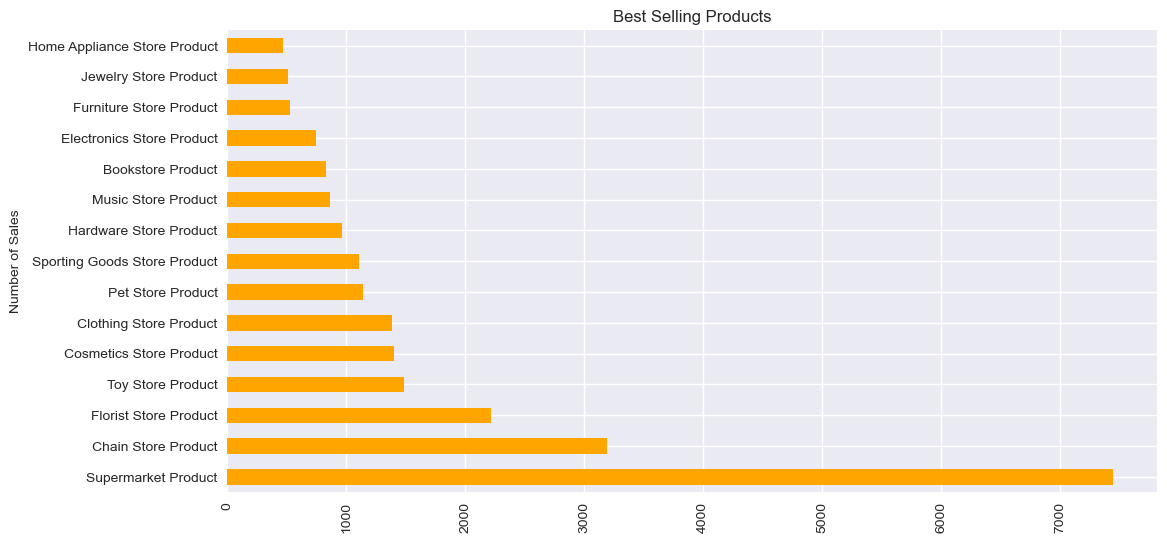

In [179]:
top_products = df.groupby("product_name_re")["quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
top_products.plot(kind="barh", color="orange")
plt.title("Best Selling Products")
plt.ylabel("Number of Sales")
plt.xticks(rotation=90)
plt.show()

Data on the purchase volume in different categories shows that supermarket products have the highest purchase volume, which can be justified due to the daily need and easy access to these products. After that, chain store products are in second place, which indicates that customers welcome various purchases in a single place. Florist products and toys are also in the next positions, which could be due to gifts and special occasions. Electronics, home appliances and jewelry have faced the lowest purchase volume, which is probably due to their higher price and periodic purchases. Accordingly, chain stores and supermarkets can increase their sales with special offers and discount schemes, and stores with lower purchase volumes can focus on providing installment terms and targeted promotions.

In [180]:
pro=df['total_amount'].sum()

In [181]:
print(f'Total sales of all products : {pro}')

Total sales of all products : 51934516331.19


In [182]:
def skew_df(dff,name):
    dff[f'{name}_reciprocal'] = (1 / (dff[name] + 1)) 
    dff[f'{name}_sqrt'] = np.sqrt(dff[name]) 
    dff[f'{name}_log'] = np.log1p(dff[name])  
    name_df = skew(dff[name]) * 10 
    name_reciprocal = skew(dff[f'{name}_reciprocal'])
    name_sqrt = skew(dff[f'{name}_sqrt'])
    name_log = skew(dff[f'{name}_log'])
    
    return name_df,name_reciprocal,name_sqrt,name_log

In [183]:
def skew_hist(dff,col,skew_name):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(dff[col], bins=20, color='skyblue', kde=True, ax=axs[0], edgecolor='black')
    axs[0].set_title(f'Distribution of {col}')
    axs[0].set_xlabel(f'{col}')
    axs[0].set_ylabel('Frequency')

    sns.histplot(dff[skew_name], bins=20, color='lightgreen', kde=True, ax=axs[1], edgecolor='black')
    axs[1].set_title(f'Distribution of {skew_name}')
    axs[1].set_xlabel('Total Log')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()

    plt.show()

In [184]:
super_ma=df[df['product_name_re']=='Supermarket Product']

In [185]:
super_amount_df,super_amount_reciprocal,super_amount_sqrt,super_amount_log = skew_df(super_ma,'total_amount')

In [186]:
print('Skewness of original campaign:', super_amount_df)

print('Skewness after reciprocal transformation:', super_amount_reciprocal)

print('Skewness after sqrt transformation:', super_amount_sqrt)

print('Skewness after log transformation:', super_amount_log)

Skewness of original campaign: 5.732896645230228
Skewness after reciprocal transformation: 2.5801579336360505
Skewness after sqrt transformation: 0.04701404234449556
Skewness after log transformation: -0.6169275596282532


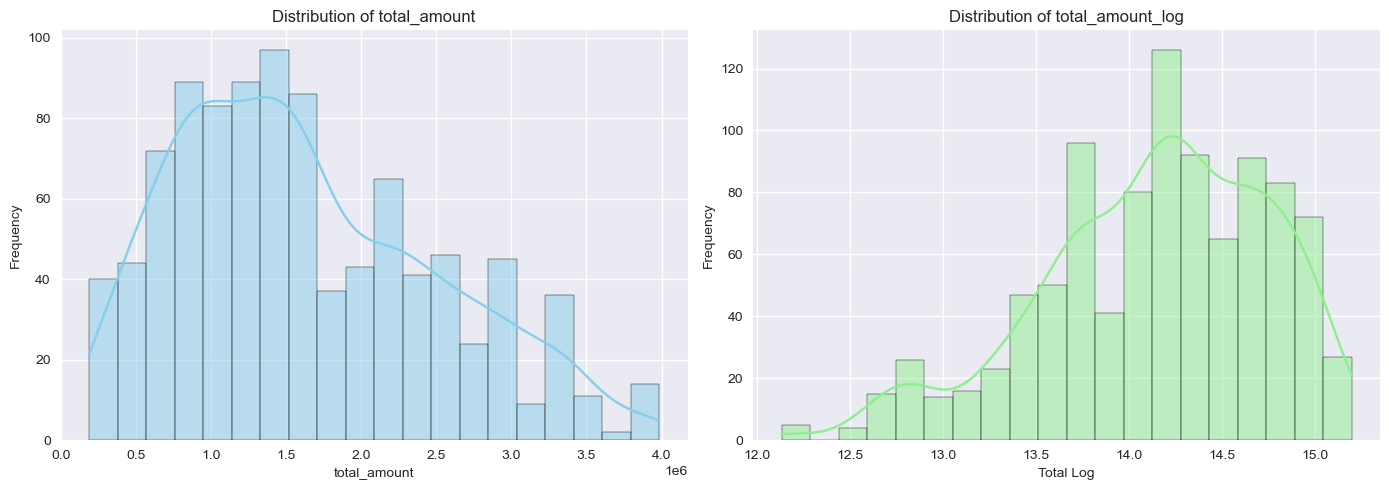

In [187]:
skew_hist(super_ma,'total_amount','total_amount_log')

In [188]:
chain_store=df[df['product_name_re']=='Chain Store Product']

In [189]:
chain_amount_df,chain_amount_reciprocal,chain_amount_sqrt,chain_amount_log = skew_df(chain_store,'total_amount')

In [190]:
print('Skewness of original campaign:', chain_amount_df)

print('Skewness after reciprocal transformation:', chain_amount_reciprocal)

print('Skewness after sqrt transformation:', chain_amount_sqrt)

print('Skewness after log transformation:', chain_amount_log)

Skewness of original campaign: 6.776417961608106
Skewness after reciprocal transformation: 5.355720357405778
Skewness after sqrt transformation: 0.09186294088621395
Skewness after log transformation: -0.6458200226685086


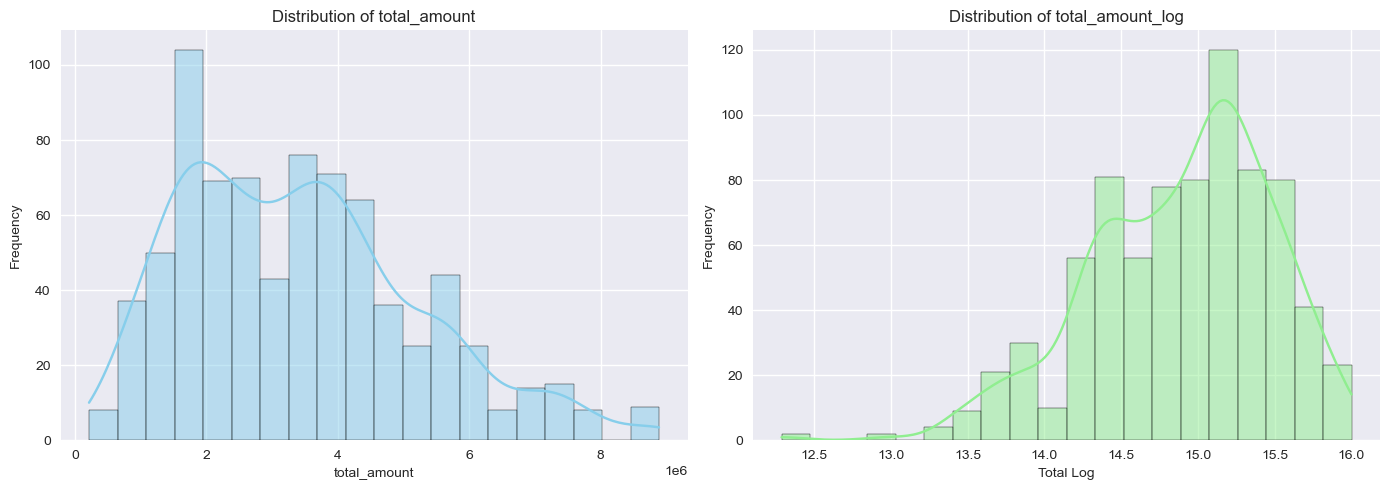

In [191]:
skew_hist(chain_store,'total_amount','total_amount_log')

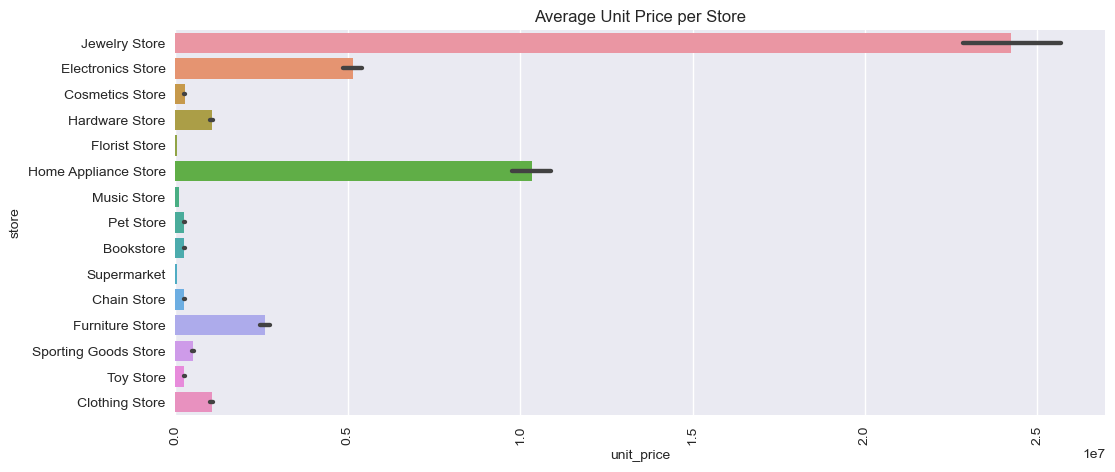

In [192]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df["unit_price"], y=df["store"])
plt.xticks(rotation=90)
plt.title("Average Unit Price per Store")
plt.show()


Products such as jewelry, electronics, home appliances, and florists are expensive.

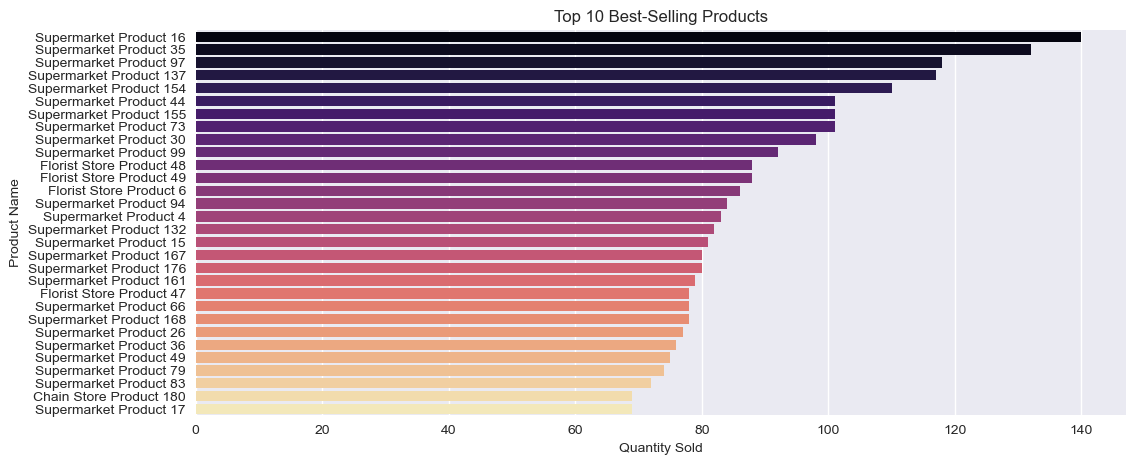

In [193]:
top_products = df.groupby("product_name")["quantity"].sum().reset_index()
top_products = top_products.sort_values(by="quantity", ascending=False).head(30)

plt.figure(figsize=(12, 5))
sns.barplot(data=top_products, x="quantity", y="product_name", palette="magma")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

Supermarkets, flower shops, and chain stores account for the majority of Iranian transactions, but most of the high-volume transactions are for supermarkets.

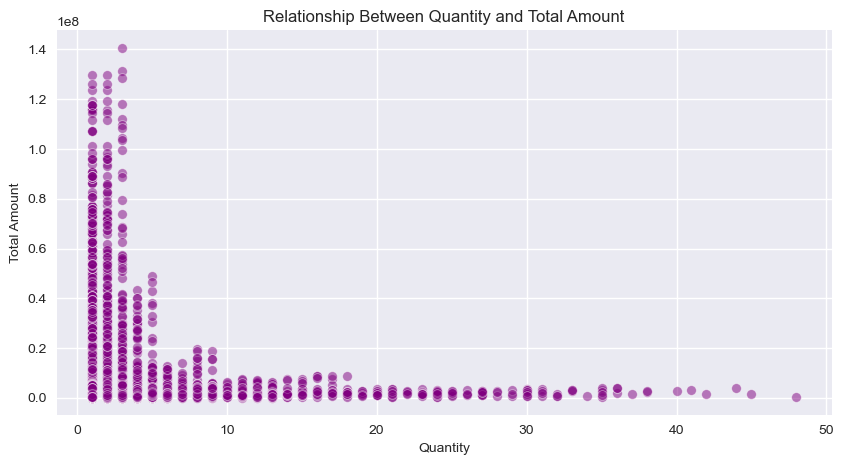

In [194]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="quantity", y="total_amount", alpha=0.5, color="purple")
plt.title("Relationship Between Quantity and Total Amount")
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.show()

Most transactions were between 1 and 5, and there were very few transactions above 5.

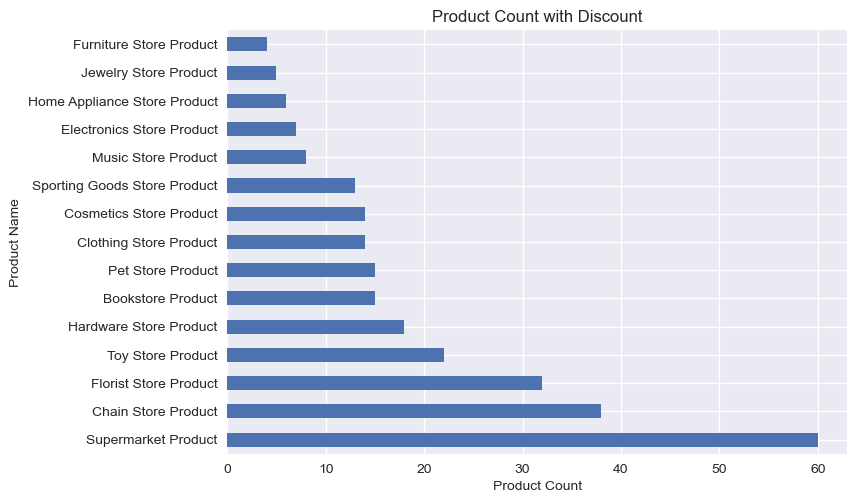

In [195]:
df["discount_amount"] = df["total_price"] - (df["unit_price"] * df["quantity"])
df[df['discount_amount']>0]['product_name_re'].value_counts().plot.barh()

plt.title('Product Count with Discount')

plt.xlabel('Product Count')
plt.ylabel('Product Name')

plt.show()

Supermarkets, chain stores, and florists have the largest number of discounted products.

# Grouping

## Grouping customers based on their purchase amount

In [196]:
customer_spending = df.groupby('user_id')['total_amount'].sum().reset_index()

In [197]:
customer_spending["log_total_amount"] = np.log1p(customer_spending["total_amount"])
q1 = customer_spending["log_total_amount"].quantile(0.33)
q2 = customer_spending["log_total_amount"].quantile(0.66)
q3 = customer_spending["log_total_amount"].max()
bins = [0, q1, q2, q3]
labels = ["Low Spender", "Regular Spender", "VIP"]
customer_spending["category"] = pd.cut(customer_spending["log_total_amount"], bins=bins, labels=labels)

In [198]:
customer_spending

,user_id,total_amount,log_total_amount,category
0,1,4.114019e+09,22.137666,Low Spender
1,2,4.824619e+09,22.296998,VIP
2,3,4.897524e+09,22.311996,VIP
3,4,3.333319e+09,21.927234,Low Spender
4,5,4.167616e+09,22.150610,Regular Spender
5,6,3.797353e+09,22.057570,Low Spender
6,7,4.731971e+09,22.277608,VIP
7,8,4.452082e+09,22.216638,Regular Spender
8,9,3.356738e+09,21.934235,Low Spender
9,10,4.654176e+09,22.261031,Regular Spender


**Grouping analysis:**



| **Cluster**         | **User IDs**      | **Characteristics**                                                                                   | **Recommendations**                                                                                       |
|---------------------|-------------------|-------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| **VIP**             | 2, 3, 7, 11       | High spenders, variety of purchases                                                                    | Provide exclusive offers, special discounts, and personalized services to maintain loyalty.               |
| **Regular Spender** | 5, 8, 10, 12      | Average spenders, diverse product reviews and purchases                                               | Encourage purchases through special offers and discounts.                                                 |
| **Low Spender**     | 1, 4, 6, 9        | Low spenders, fewer purchases, low spending                                                           | Attract them with discounts, coupons, and loyalty incentives to increase purchases and loyalty.           |


In [199]:
df["log_total_amount"] = np.log1p(df["total_amount"])
q1 = df["log_total_amount"].quantile(0.33)
q2 = df["log_total_amount"].quantile(0.66)
q3 = df["log_total_amount"].max()
bins = [0, q1, q2, q3]
labels = ["Low Spender", "Regular Spender", "VIP"]
df["category"] = pd.cut(df["log_total_amount"], bins=bins, labels=labels)

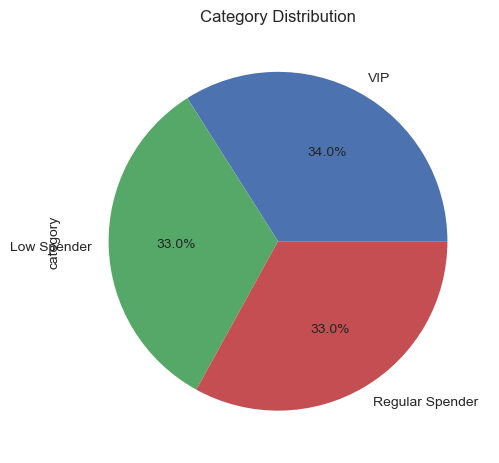

In [200]:
df['category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Category Distribution')

plt.show()

## Grouping customers based on their purchases at different times of the day

In [201]:
def time_of_day(hour):
    if 6 <= hour < 12:
        return "morning"
    elif 12 <= hour < 18:
        return "noon"
    elif 18 <= hour < 24:
        return "evening"
    else:
        return "night"

df["hour"] = df["transaction_time"].apply(lambda x: x.hour)
df["time_category"] = df["hour"].apply(time_of_day)

time_pattern = df["time_category"].value_counts()

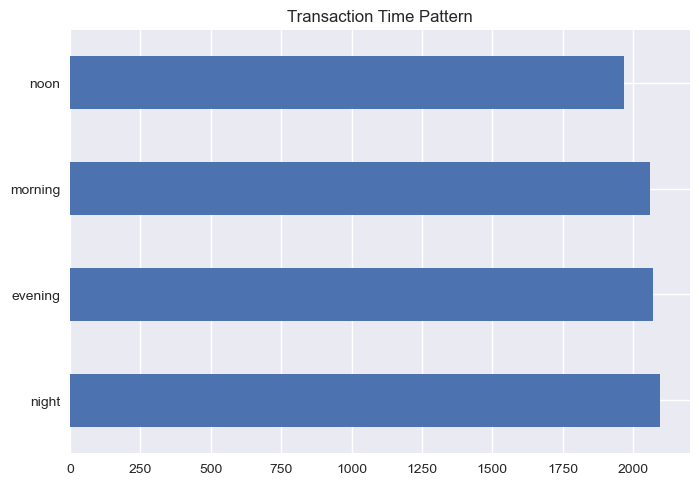

In [202]:
time_pattern.plot.barh()
plt.title('Transaction Time Pattern')

plt.show()

In [239]:
time_pattern_user_purchases = df.groupby(['user_id', "time_category"])['total_amount'].sum().reset_index()

max_time_pattern_purchases = time_pattern_user_purchases.loc[time_pattern_user_purchases.groupby("time_category")['total_amount'].idxmax()]

max_time_pattern_purchasess = max_time_pattern_purchases.sort_values(by="time_category")

max_time_pattern_purchasess

,user_id,time_category,total_amount
40,11,evening,1.781691e+09
25,7,morning,1.741639e+09
10,3,night,1.596138e+09
39,10,noon,1.521961e+09


**The grouping analysis table is as follows:**

<table border="1">
  <thead>
    <tr>
      <th>User ID</th>
      <th>Time Category</th>
      <th>Total Amount</th>
      <th>Analysis</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>40</td>
      <td>Evening</td>
      <td>1.781691e+09</td>
      <td>This user makes the highest purchases in the evening time category, suggesting they are most active during these hours. It indicates evening as a peak buying time for this user.</td>
    </tr>
    <tr>
      <td>25</td>
      <td>Morning</td>
      <td>1.741639e+09</td>
      <td>This user has a significant amount of purchases in the morning, showing a preference for early hours. This could be linked to morning routines or specific product availability.</td>
    </tr>
    <tr>
      <td>10</td>
      <td>Night</td>
      <td>1.596138e+09</td>
      <td>This user tends to make purchases during the night, possibly reflecting a late-night shopping habit. There might be specific products or promotions attracting them during these hours.</td>
    </tr>
    <tr>
      <td>39</td>
      <td>Noon</td>
      <td>1.521961e+09</td>
      <td>This user shows a preference for noon, which might correlate with lunchtime shopping or break-time online purchasing behavior.</td>
    </tr>
  </tbody>
</table>


## Display pairs of purchases for each customer

In [203]:
from itertools import combinations
from collections import Counter

In [204]:
user1=df[df['user_id']==1]

In [205]:
transactions = user1.groupby("transaction_id")["product_name"].apply(list)

product_combinations = Counter()
for items in transactions:
    product_combinations.update(combinations(sorted(items), 2))

product_combinations.most_common(10)

[(('Florist Store Product 40', 'Florist Store Product 41'), 2),
 (('Florist Store Product 16', 'Florist Store Product 47'), 2),
 (('Jewelry Store Product 2', 'Jewelry Store Product 48'), 2),
 (('Supermarket Product 140', 'Supermarket Product 55'), 2),
 (('Pet Store Product 22', 'Pet Store Product 36'), 2),
 (('Sporting Goods Store Product 100', 'Sporting Goods Store Product 106'), 2),
 (('Sporting Goods Store Product 100', 'Sporting Goods Store Product 74'), 2),
 (('Pet Store Product 20', 'Pet Store Product 7'), 2),
 (('Sporting Goods Store Product 44', 'Sporting Goods Store Product 76'), 2),
 (('Pet Store Product 21', 'Pet Store Product 25'), 2)]

## Customer grouping based on product names and user IDs

In [206]:
product_variety = df.groupby("user_id")["product_name"].nunique().reset_index()

q33 = product_variety["product_name"].quantile(0.33) 
q66 = product_variety["product_name"].quantile(0.66)  
max_value = product_variety["product_name"].max()  

bins = [0, q33, q66, max_value]
labels = ["low-diversity", "medium-diversity", "high-diversity"]
product_variety["category"] = pd.cut(product_variety["product_name"], bins=bins, labels=labels, include_lowest=True)

product_variety

,user_id,product_name,category
0,1,506,low-diversity
1,2,528,medium-diversity
2,3,556,high-diversity
3,4,550,high-diversity
4,5,477,low-diversity
5,6,507,medium-diversity
6,7,503,low-diversity
7,8,505,low-diversity
8,9,534,medium-diversity
9,10,537,high-diversity


**Clustering analysis:**



| **Diversity Category** | **User IDs**      | **Characteristics**                                   | **Examples of Products**                                             |
|------------------------|-------------------|-------------------------------------------------------|---------------------------------------------------------------------|
| **Low-Diversity**       | 1, 5, 7, 8        | Fewer types of purchases, limited product range      | Products with fewer variations or limited categories.               |
| **Medium-Diversity**    | 2, 6, 9, 12       | Moderate range of purchases                          | Products that offer some variety but within a certain category.     |
| **High-Diversity**      | 3, 4, 10, 11      | Large variety of purchases, wide range of products   | Products with many variations, covering a broad range of categories. |


## Grouping customers by Hours and Days

In [232]:
weekday_behavior = df[["user_id", "weekday","transaction_id"]]
hour_behavior = df[["user_id", "transaction_time","transaction_id"]]

In [233]:
weekend_mapping = {
    "Thursday": "Weekend",
    "Friday": "Weekend",
    "Saturday": "Start of Week"
}


weekday_behavior["category"] = weekday_behavior["weekday"].map(weekend_mapping).fillna("Midweek")

In [234]:
weekday_behavior

,user_id,weekday,transaction_id,category
0,1,Wednesday,1,Midweek
1,1,Thursday,2,Weekend
2,1,Friday,3,Weekend
3,1,Friday,3,Weekend
4,1,Saturday,4,Start of Week
...,...,...,...,...
8187,12,Wednesday,306,Midweek
8188,12,Friday,307,Weekend
8189,12,Friday,307,Weekend
8190,12,Friday,308,Weekend


In [236]:
hour_behavior["hour"] = hour_behavior["transaction_time"].apply(lambda x: x.hour)

hour_behavior["category"] = np.where(hour_behavior["hour"].between(17, 19), 
                                     "Peak Hours", 
                                     "Off-Peak Hours")

In [237]:
hour_behavior

,user_id,transaction_time,transaction_id,hour,category
0,1,23:38:58,1,23,Off-Peak Hours
1,1,16:41:29,2,16,Off-Peak Hours
2,1,07:45:32,3,7,Off-Peak Hours
3,1,07:45:32,3,7,Off-Peak Hours
4,1,15:22:12,4,15,Off-Peak Hours
...,...,...,...,...,...
8187,12,13:23:31,306,13,Off-Peak Hours
8188,12,08:10:55,307,8,Off-Peak Hours
8189,12,08:10:55,307,8,Off-Peak Hours
8190,12,22:01:02,308,22,Off-Peak Hours


## Customer grouping based on RFM

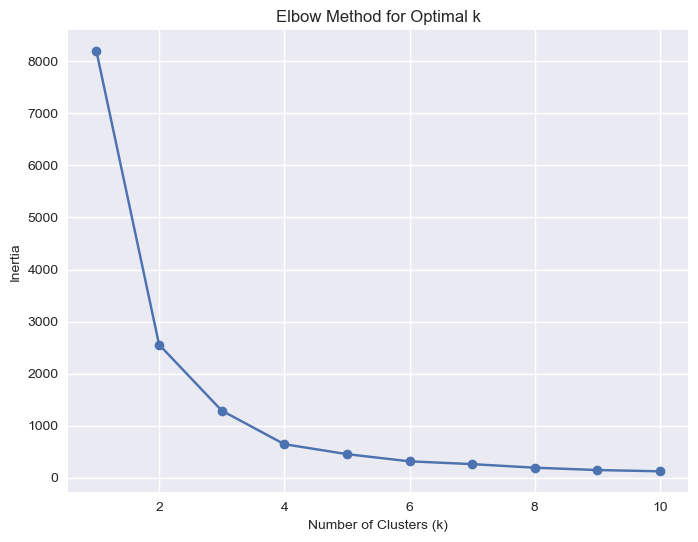

In [241]:
X = df[['total_price']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

The Elbow plot shows that as the number of clusters increases, the amount of intra-cluster variation decreases, but after a certain point, the decrease becomes less and the plot becomes almost constant. Here, it seems that the best point to choose the number of clusters is around 3 or 4, because after that, the decrease in variation is not so significant. Choosing this value ensures that the clustering is optimal and the data is grouped correctly without increasing the complexity too much.

### Clustering based on total_spent, transaction_count, and product_variety features using the RFM algorithm:

In [219]:
features = df.groupby("user_id").agg(
    total_spent=("total_amount", "sum"),
    transaction_count=("transaction_id", "count"),
    product_variety=("product_name", "nunique")
).reset_index()

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features[["total_spent", "transaction_count", "product_variety"]])

kmeans = KMeans(n_clusters=3, random_state=0)
features["Cluster"] = kmeans.fit_predict(features_scaled)

features


,user_id,total_spent,transaction_count,product_variety,Cluster
0,1,4.114019e+09,661,506,0
1,2,4.824619e+09,673,528,0
2,3,4.897524e+09,708,556,1
3,4,3.333319e+09,717,550,2
4,5,4.167616e+09,624,477,0
5,6,3.797353e+09,636,507,0
6,7,4.731971e+09,660,503,0
7,8,4.452082e+09,678,505,0
8,9,3.356738e+09,689,534,2
9,10,4.654176e+09,725,537,1




| user_id | total_spent   | transaction_count | product_variety | Cluster | Cluster Analysis |
|---------|---------------|------------------|-----------------|---------|------------------|
| 1       | 4.114019e+09  | 661              | 506             | 0       | **High spender, frequent buyer, diverse products.** Likely a loyal customer with high purchase volume and variety. |
| 2       | 4.824619e+09  | 673              | 528             | 0       | **High spender, frequent buyer, diverse products.** Likely a loyal customer with high purchase volume and variety. |
| 3       | 4.897524e+09  | 708              | 556             | 1       | **High spender, frequent buyer, very diverse products.** This customer is highly engaged and spends a lot on a variety of products. |
| 4       | 3.333319e+09  | 717              | 550             | 2       | **Moderate spender, frequent buyer, high product variety.** This customer buys frequently but spends less overall, possibly exploring different products. |
| 5       | 4.167616e+09  | 624              | 477             | 0       | **High spender, frequent buyer, diverse products.** A loyal customer with significant spending and varied purchases. |
| 6       | 3.797353e+09  | 636              | 507             | 0       | **High spender, frequent buyer, diverse products.** A loyal customer who buys a lot and purchases from a wide variety of products. |
| 7       | 4.731971e+09  | 660              | 503             | 0       | **High spender, frequent buyer, diverse products.** A high-value, frequent customer with varied purchases. |
| 8       | 4.452082e+09  | 678              | 505             | 0       | **High spender, frequent buyer, diverse products.** A loyal, high-spending customer with a wide product selection. |
| 9       | 3.356738e+09  | 689              | 534             | 2       | **Moderate spender, frequent buyer, very diverse products.** Engages in frequent purchases but spends less overall, showing interest in various products. |
| 10      | 4.654176e+09  | 725              | 537             | 1       | **High spender, frequent buyer, very diverse products.** A highly active, high-spending customer who buys a lot of different items. |
| 11      | 5.236716e+09  | 762              | 584             | 1       | **High spender, frequent buyer, very diverse products.** A very active customer with large spending and a high variety of purchases. |
| 12      | 4.368383e+09  | 659              | 509             | 0       | **High spender, frequent buyer, diverse products.** A loyal customer with significant spending and varied product purchases. |


### Customer satisfaction ranking using the RFM algorithm:

In [220]:
latest_date = df["transaction_date"].max()

rfm = df.groupby("user_id").agg(
    Recency=("transaction_date", lambda x: (latest_date - x.max()).days),  
    Frequency=("transaction_id", "count"),  
    Monetary=("total_amount", "sum")  
).reset_index()

In [221]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

kmeans = KMeans(n_clusters=3, random_state=0)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

In [222]:
rfm

,user_id,Recency,Frequency,Monetary,Cluster
0,1,0,661,4.114019e+09,0
1,2,0,673,4.824619e+09,0
2,3,0,708,4.897524e+09,2
3,4,0,717,3.333319e+09,1
4,5,0,624,4.167616e+09,0
5,6,0,636,3.797353e+09,0
6,7,0,660,4.731971e+09,0
7,8,0,678,4.452082e+09,0
8,9,0,689,3.356738e+09,1
9,10,0,725,4.654176e+09,2


**The percentage of each group of users in RFM clustering is as follows:**

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Cluster</th>
      <th>Number of Users</th>
      <th>Percentage of Total Users</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>7</td>
      <td>58.33%</td>
    </tr>
    <tr>
      <td>1</td>
      <td>2</td>
      <td>16.67%</td>
    </tr>
    <tr>
      <td>2</td>
      <td>3</td>
      <td>25%</td>
    </tr>
  </tbody>
</table>


In [223]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette = silhouette_score(rfm_scaled, rfm["Cluster"])
print(f"Silhouette Score: {silhouette:.4f}")

davies_bouldin = davies_bouldin_score(rfm_scaled, rfm["Cluster"])
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")

Silhouette Score: 0.4913
Davies-Bouldin Score: 0.5725


Given the Silhouette Score = 0.4913 and Davies-Bouldin Score = 0.5725, this clustering seems to have acceptable quality.

### **User analysis based on clustering (RFM + Clustering)**

<table>
        <tr>
            <th>Cluster</th>
            <th>Users</th>
            <th>Total Spent</th>
            <th>Transaction Count</th>
            <th>Product Variety</th>
            <th>Analysis & Suggestions</th>
        </tr>
        <tr>
            <td><b>Cluster 0</b><br>(Active Customers with Controlled Spending)</td>
            <td>1, 2, 5, 6, 7, 8, 12</td>
            <td>3.79B – 4.82B</td>
            <td>624 – 678</td>
            <td>477 – 528</td>
            <td>These are loyal customers with relatively high but controlled purchases. Targeted discounts and special offers can encourage more spending.</td>
        </tr>
        <tr>
            <td><b>Cluster 1</b><br>(High-Spending & Highly Active Customers)</td>
            <td>3, 10, 11</td>
            <td>4.89B – 5.23B</td>
            <td>708 – 762</td>
            <td>537 – 584</td>
            <td>These are premium customers who spend the most and have a diverse shopping pattern. Offering VIP programs, exclusive deals, and personalized engagement is crucial.</td>
        </tr>
        <tr>
            <td><b>Cluster 2</b><br>(Moderate-Spending Customers with High Engagement)</td>
            <td>4, 9</td>
            <td>3.33B – 3.35B</td>
            <td>689 – 717</td>
            <td>534 – 550</td>
            <td>These customers are interested in a variety of products but spend moderately. Volume discounts, free shipping, and targeted promotions can boost their spending.</td>
        </tr>
    </table>

</body>
</html>


In [225]:
rfm_cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

rfm_cluster_summary

,Cluster,Recency,Frequency,Monetary
0,0,0.0,655.857143,4.350863e+09
1,1,0.0,703.000000,3.345029e+09
2,2,0.0,731.666667,4.929472e+09


<table>
        <thead>
            <tr>
                <th>Cluster</th>
                <th>Recency</th>
                <th>Frequency (Avg. Transactions per Customer)</th>
                <th>Monetary (Avg. Spending per Customer)</th>
                <th>Analysis & Strategy</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>0</td>
                <td>0</td>
                <td>655.86</td>
                <td>4.35B</td>
                <td>Frequent buyers with high spending. Offer loyalty programs, personalized recommendations, and premium support.</td>
            </tr>
            <tr>
                <td>1</td>
                <td>1</td>
                <td>703.00</td>
                <td>3.34B</td>
                <td>Higher frequency but lower spending. Promotions, volume discounts, and bundle offers can boost spending.</td>
            </tr>
            <tr>
                <td>2</td>
                <td>2</td>
                <td>731.67</td>
                <td>4.93B</td>
                <td>Top-tier customers with the highest spending. Provide VIP memberships, exclusive offers, and early product access.</td>
            </tr>
        </tbody>
    </table>

</body>
</html>

# **General summary based on the RFM algorithm:**  
- **Cluster 2** has the highest average spending and frequency, indicating they are premium customers.  
- **Cluster 1** has the highest frequency but lower spending, suggesting they might be bargain hunters.  
- **Cluster 0** balances frequency and spending, making them a stable and loyal customer base.  
- All clusters have **Recency = 0**, meaning they are currently active, and retention strategies should focus on keeping them engaged.